In [1]:
#general/plotting
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import cm
import math

pyplot_style ={"text.usetex": True,
               "text.latex.preamble": r"\usepackage{amsfonts}\usepackage[version=4]{mhchem}",
               "axes.spines.right" : False,
               "axes.spines.top" : False,
               "font.size": 22,
               "savefig.dpi": 600,
               "savefig.bbox": 'tight'
              } 

## Pluronic P123 Temperature Phase Diagram

In [2]:
# Load excel with structures
samples = pd.read_excel('./20220414_APS_Cap1.xlsx')

In [3]:
# define structure and colors
phases= ['Unimer', 'Multiphase', 'Correlated Micelle', 'Micelle', 'FCC',  'RHCP',      'HCP',  'HCP+HEX',     'HEX']
colors = ['lightgrey', 'brown',      'darkorange' ,        'tan',     'green','turquoise', 'turquoise', 'turquoise', 'blue']
marks = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']

#Connect structure to color
def struc_color(struc, phase_list):
    for i in range(len(phase_list)):
        if struc == phase_list[i]:
            return colors[i]  

#Connect structure to mark
def struc_mark(struc, phase_list):
    for i in range(len(phase_list)):
        if struc == phase_list[i]:
            return marks[i]

In [4]:
def phase_dia(x_col, y_col, title):
    
    f = plt.figure(figsize=(10,10))

    x = samples[x_col].values
    y = samples[y_col].values
    
    phase_struc = samples['Phase'].values
    phase_mark = []
    phase_color = []
    
    phase_struc_u = samples.Phase.unique()
    
    # Plotting
    for i in range(len(samples)):
        phase_mark.append(struc_mark(phase_struc[i], phases))
        phase_color.append(struc_color(phase_struc[i], phases))
        plt.plot(x[i], y[i], color = phase_color[i], marker=phase_mark[i], markersize = 20, markeredgecolor='black', markeredgewidth = 0, linestyle= 'None')
    # Formatting
#     plt.title(title, fontsize=22)
#     legend = plt.legend(fontsize=14, bbox_to_anchor=(1,1), loc="upper left")
    plt.xlabel('P123 wt%', fontsize=22)#, weight='bold')
    plt.ylabel('Temperature (°C)', fontsize=22)#, weight='bold')
    plt.xticks(np.arange(20, 41, 5), fontsize=20)#, weight='bold')
    plt.yticks(np.arange(0, 81, 10), fontsize=20)#, weight='bold') 
    
    # Save figure
#     f.savefig("PM.png", bbox_inches='tight', dpi=600)

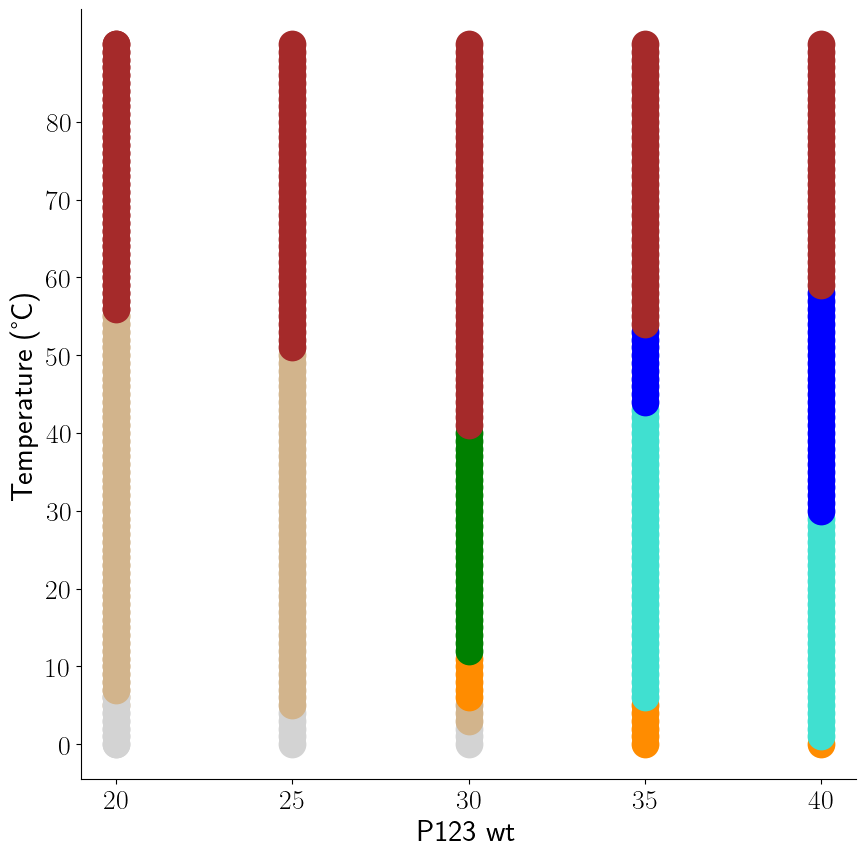

In [6]:
with plt.style.context(pyplot_style):
    phase_dia('3P wt%', 'Temp', 'PPBT_0_P123_Y')
    plt.savefig('manual_7.pdf')

## Pluronic P123 35 wt% 

In [7]:
#load data
sequence = np.load('P123_35.npz')
sequence

q = sequence['q']
I = sequence['I']

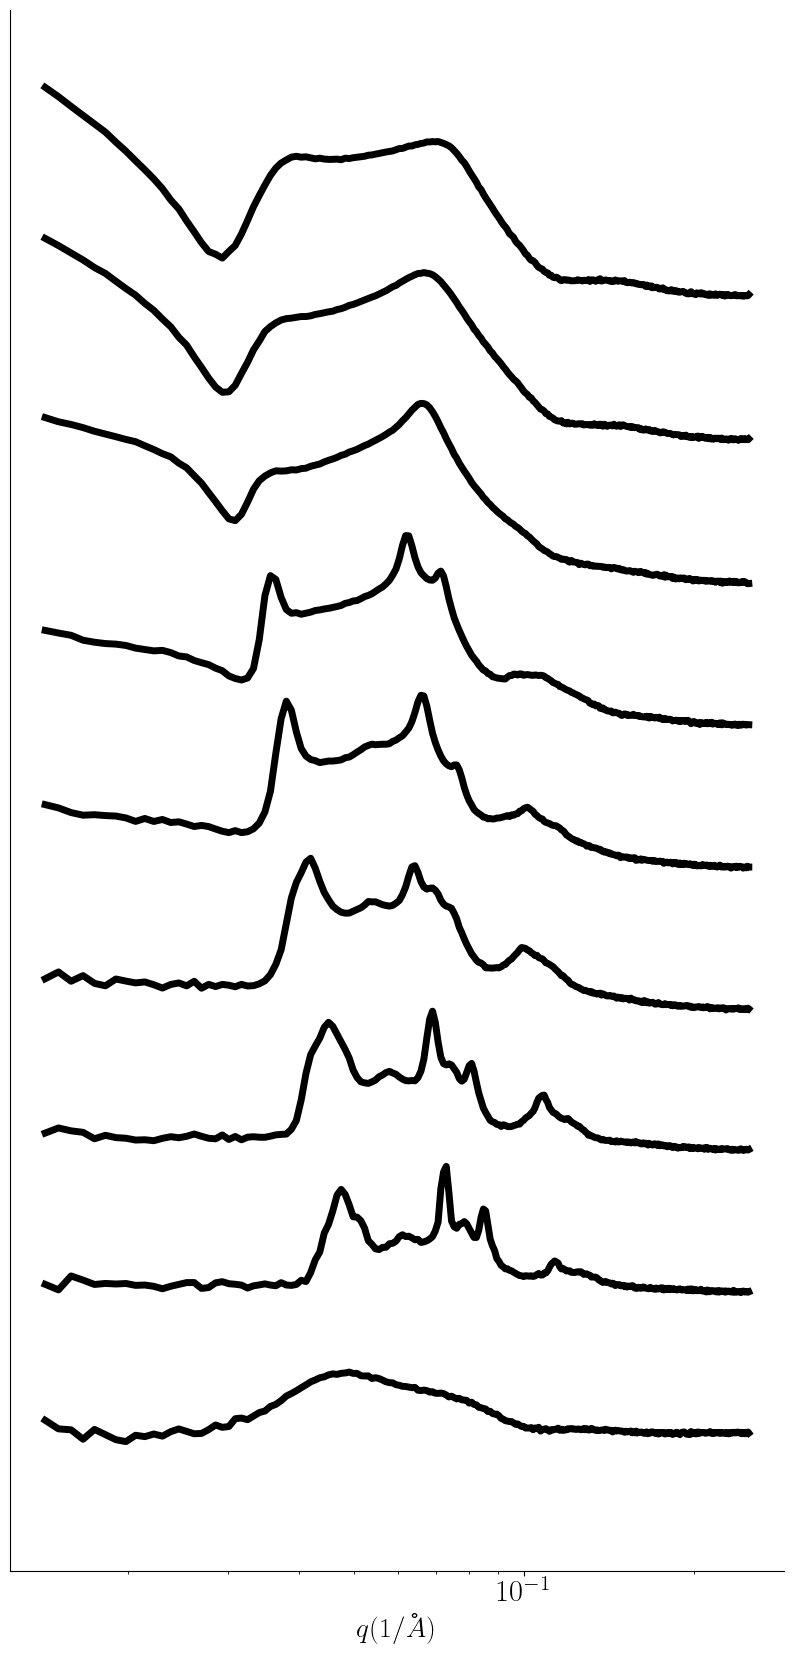

In [9]:
with plt.style.context(pyplot_style):
    f = plt.figure(figsize=(8.4,17))        

    # plot
    for i in range(len(q)):
        qval = q[i]
        intensity = I[i]
        plt.plot(qval, intensity, c = 'black', linewidth = 5)

    # formatting
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$q (1/Å)$', fontsize=20)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.tick_params(left = False, right = False , labelleft = False)
    plt.ylim(1e-3, 1e8)
    plt.tight_layout()  

    # Save figure
    plt.savefig('p123_35_trans.pdf')